In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat
from sklearn import svm
from sklearn.model_selection import train_test_split


In [7]:
# 使用loadmat函数加载.mat文件
raw_data = loadmat('F:/MachineLearning/MachineLearning_HW_CQUT-master/HW3 SVM/data1.mat')
# 将前两列特征和最后一列目标值读入data中
data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']


In [8]:
#将数据集按照7:3的比率划分训练集和验证集。
data_train, data_test = train_test_split(data, test_size=0.3, random_state=42)#训练集：测试集=7：3
data_train

,X1,X2,y
36,1.491900,2.0271,0
33,1.561000,3.0709,0
19,3.035700,3.3165,1
48,0.904400,3.0198,0
15,3.185500,4.2888,1
9,2.551800,4.6162,1
16,3.657900,3.8692,1
26,3.047300,2.2931,0
44,2.448200,2.6411,0
25,2.828300,2.6309,0


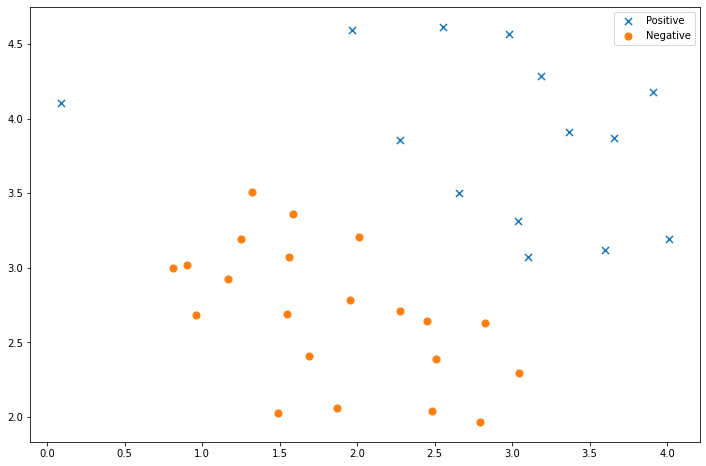

In [5]:
positive = data_train[data_train['y'].isin([1])]
negative = data_train[data_train['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['X1'], positive['X2'], s=50, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=50, marker='o', label='Negative')
ax.legend()
plt.show()



In [9]:
# 定义SVM模型
svc = svm.LinearSVC(C=1, loss='hinge', max_iter=1000)
# 对模型进行训练
svc.fit(data_train[['X1', 'X2']], data_train['y'])


LinearSVC(C=1, loss='hinge')

In [12]:
svc.score(data_test[['X1', 'X2']], data_test['y'])


1.0

In [17]:
print('验证集准确率：{}%'.format(100*svc.score(data_test[['X1', 'X2']], data_test['y'])))

验证集准确率：100.0%


Text(0.5, 1.0, 'SVM (C=1) 决策边界')

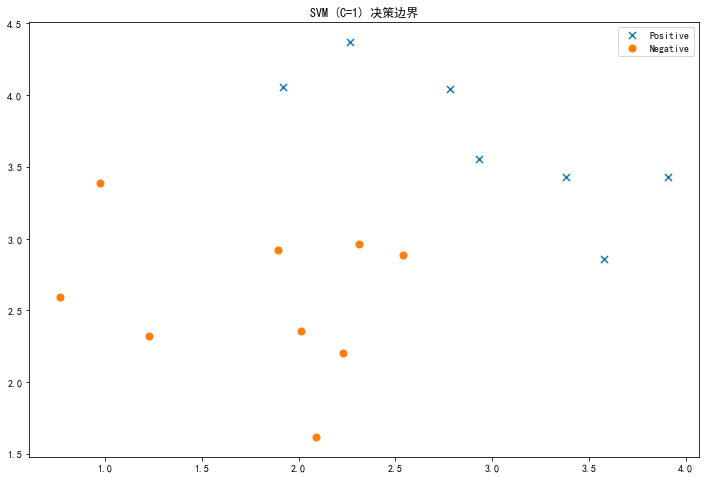

In [15]:
plt.rcParams['font.family'] = 'SimHei'

# 划分测试集上的标签分别为0和1的数据项
positive = data_test[data_test['y'].isin([1])]
negative = data_test[data_test['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['X1'], positive['X2'], s=50, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=50, marker='o', label='Negative')
ax.legend()
ax.set_title('SVM (C=1) 决策边界')


# 决策边界, 使用等高线表示
x1 = np.arange(0, 4.5, 0.01)
x2 = np.arange(0, 5, 0.01)
x1, x2 = np.meshgrid(x1, x2)
y_pred = np.array([svc.predict(np.vstack((a, b)).T) for (a, b) in zip(x1, x2)])
plt.contour(x1, x2, y_pred, colors='g', linewidths=.5)
plt.show()


LinearSVC(C=1, loss='hinge')

1.0

C:\Users\ZSY\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ZSY\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
C:\Users\ZSY\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
C:\Users\ZSY\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
C:\Users\ZSY\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
C:\Users\ZSY\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted w

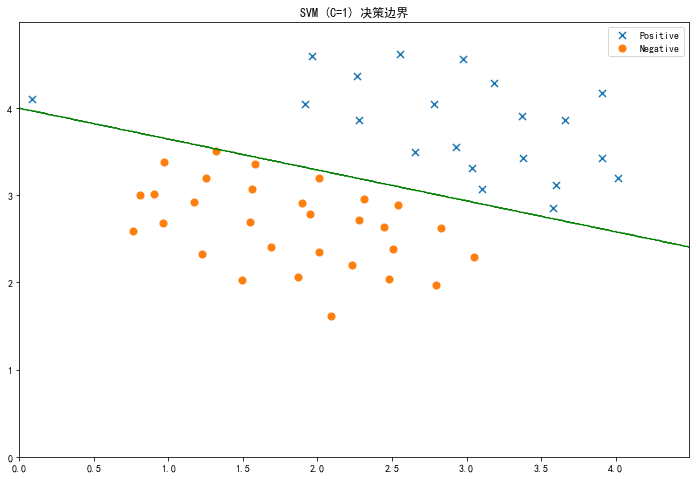

In [22]:
svc2 = svm.LinearSVC(C=100, loss='hinge', max_iter=1000)
svc2.fit(data_train[['X1', 'X2']], data_train['y'])
svc2.score(data_test[['X1', 'X2']], data_test['y'])

plt.rcParams['font.family'] = 'SimHei'

# 划分测试集上的标签分别为0和1的数据项
positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['X1'], positive['X2'], s=50, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=50, marker='o', label='Negative')
ax.legend()
ax.set_title('SVM (C=1) 决策边界')

# 决策边界, 使用等高线表示
x1 = np.arange(0, 4.5, 0.01)
x2 = np.arange(0, 5, 0.01)
x1, x2 = np.meshgrid(x1, x2)
y_pred = np.array([svc2.predict(np.vstack((a, b)).T) for (a, b) in zip(x1, x2)])
plt.contour(x1, x2, y_pred, colors='g', linewidths=.5)

plt.show()

In [24]:
svc2.score(data[['X1', 'X2']], data['y'])

1.0